In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df['species'] = df['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2})

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [10]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

# Data Visualization

<Axes: xlabel='species', ylabel='sepal_length'>

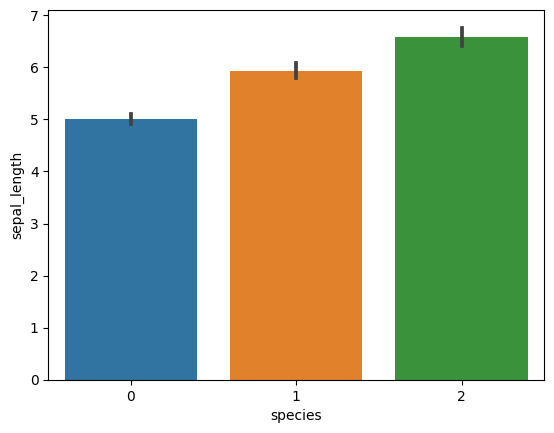

In [11]:
sns.barplot(data=df, x='species', y='sepal_length')

<Axes: xlabel='species', ylabel='sepal_width'>

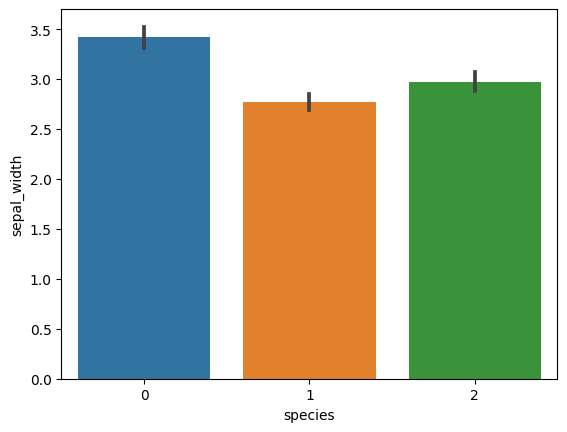

In [12]:
sns.barplot(data=df, x='species', y='sepal_width')

<Axes: xlabel='species', ylabel='petal_length'>

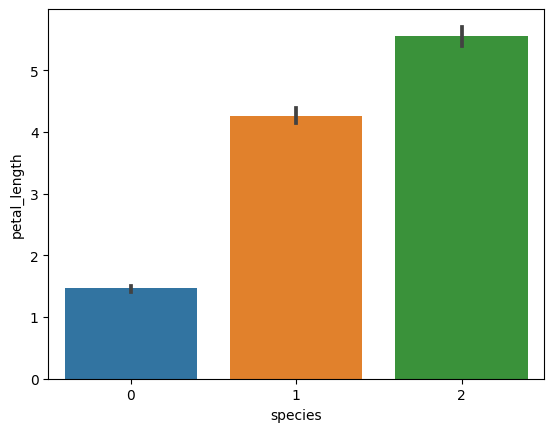

In [13]:
sns.barplot(data=df, x='species', y='petal_length')

<Axes: xlabel='species', ylabel='petal_width'>

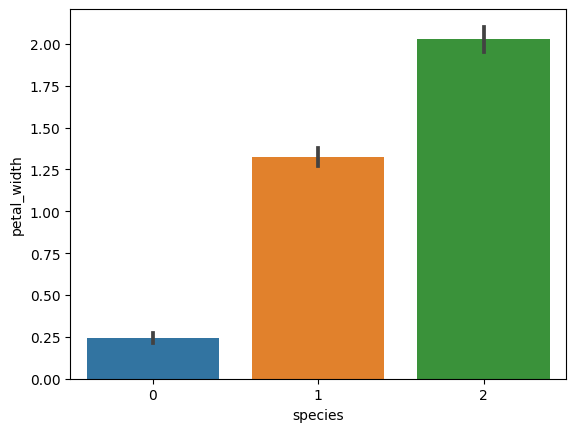

In [14]:
sns.barplot(data=df, x='species', y='petal_width')

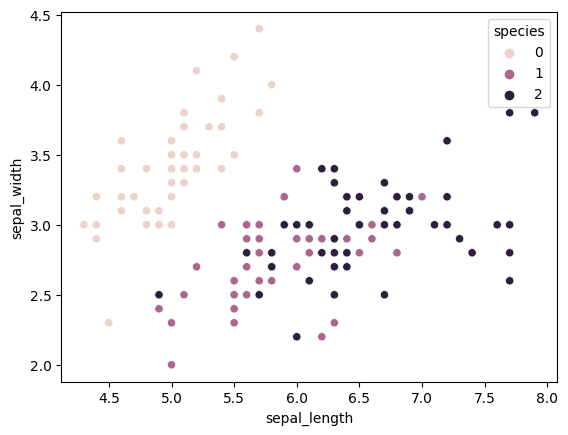

In [15]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.show()

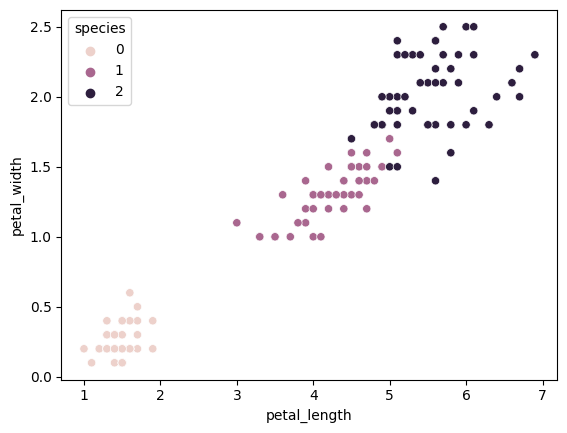

In [16]:
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df)
plt.show()

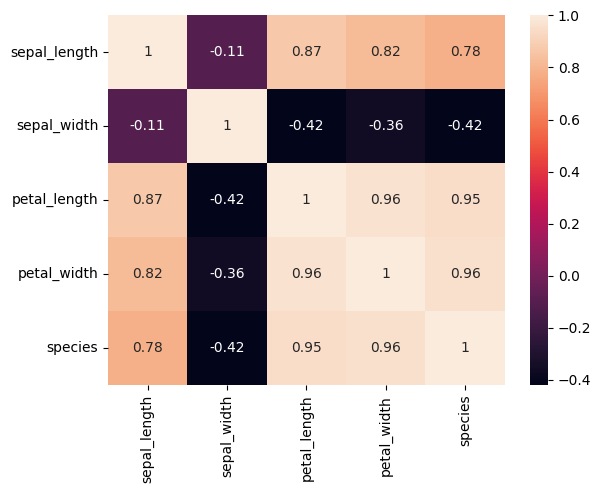

In [17]:
sns.heatmap(df.corr(), annot=True)
plt.show()

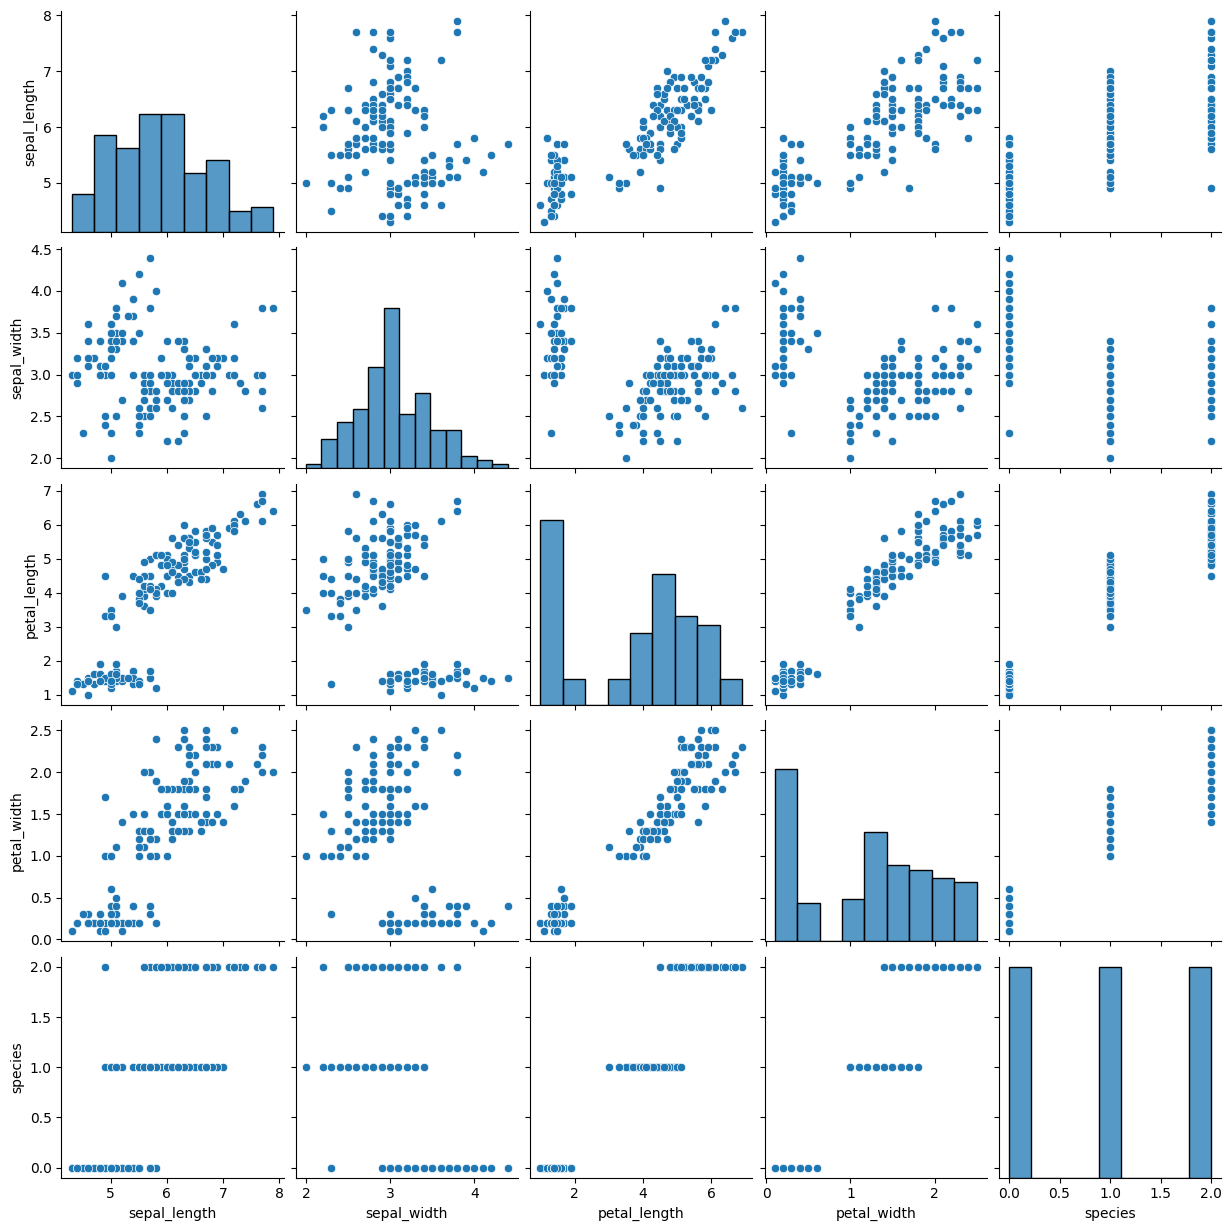

In [18]:
sns.pairplot(df)

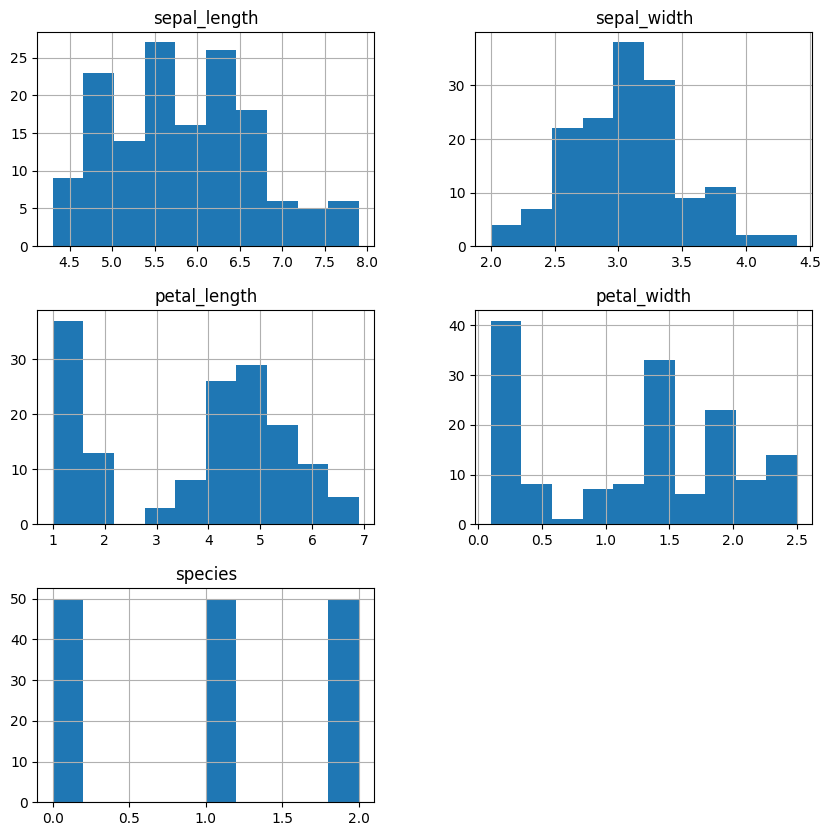

In [19]:
df.hist(figsize=(10,10))
plt.show()

In [20]:
x = df.drop('species', axis=1)
y = df['species']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [22]:
dt_classifier = DecisionTreeClassifier()

In [23]:
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = dt_classifier.predict(x_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Classification Report: {report}")

Accuracy: 0.9333333333333333
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.82      0.90        11
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30



In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors=10, p=1)

In [27]:
knn_classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10, p=1)

In [28]:
y_pred = knn_classifier.predict(x_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9333333333333333


In [30]:
from sklearn.svm import SVC

In [43]:
svm = SVC()

In [44]:
svm.fit(x_train, y_train)

SVC()

In [45]:
y_pred = svm.predict(x_test)

In [46]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667


In [35]:
logreg = LogisticRegression()

In [36]:
logreg.fit(x_train, y_train)

LogisticRegression()

In [37]:
y_pred = logreg.predict(x_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9666666666666667
